In [1]:
# importing libaries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from scipy.stats import zscore, boxcox
import statsmodels.formula.api as smf
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

## importing the database

In [2]:
#storing the file path/ url path in a variable
df0 = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

## top 5 and bottom 5 data

In [3]:
#read top 5 rows of the data
df0.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df0.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df0.shape[0], df0.shape[1]))

Rows: 907 Columns: 27


## it has 907 rows and 27 columns

In [6]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(907, 27)
 
country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


## it has 2 types of data- float and object

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## there are too many null data present  in this dataset. we will handle it later

In [8]:
# Statistical summary
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [9]:
#total missing values
df0.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

## other_fuel1,other_fuel2,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh these columns has empty data(almost), we will remove it later .

In [10]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  1
latitude                     0
longitude                    0
primary_fuel                 0
other_fuel1                  0
other_fuel2                  0
other_fuel3                  0
commissioning_year           0
owner                        0
source                       0
url                          0
geolocation_source           0
wepp_id                      0
year_of_capacity_data        0
generation_gwh_2013          0
generation_gwh_2014         28
generation_gwh_2015         27
generation_gwh_2016         30
generation_gwh_2017         32
generation_gwh_2018         39
generation_gwh_2019          0
generation_data_source       0
estimated_generation_gwh     0
dtype: int64

In [11]:
# Checking the counts of label categories
primary_fuel = df0['primary_fuel'].value_counts(normalize=True)
round(primary_fuel * 100, 2).astype('str') + ' %'

Coal       28.45 %
Hydro      27.67 %
Solar       14.0 %
Wind       13.56 %
Gas         7.61 %
Biomass     5.51 %
Oil         2.21 %
Nuclear     0.99 %
Name: primary_fuel, dtype: object

## our taget has 8 different types of data with maximum belong to Coal and minimum belong to Nuclear(it has minimal data)

# droping the cloumns which is not required for the model preparation

In [12]:
df0.drop(["country","country_long","name","gppd_idnr","other_fuel1","other_fuel2","other_fuel3",
          "wepp_id","generation_gwh_2013","generation_gwh_2019",
          "estimated_generation_gwh"],axis=1,inplace=True)

In [13]:
df1=df0.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   owner                   342 non-null    object 
 6   source                  907 non-null    object 
 7   url                     907 non-null    object 
 8   geolocation_source      888 non-null    object 
 9   year_of_capacity_data   519 non-null    float64
 10  generation_gwh_2014     398 non-null    float64
 11  generation_gwh_2015     422 non-null    float64
 12  generation_gwh_2016     434 non-null    float64
 13  generation_gwh_2017     440 non-null    float64
 14  generation_gwh_2018     448 non-null    fl

In [15]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# this dataset has too many null value and we can not drop or impute every null values from it. so we will try it to remove from Row,so that minimum data will get deleted. 

## droping the rows that has null values from Latitude column

In [16]:
df2=pd.DataFrame(data=df1)
df2=df2.dropna(subset=['latitude'])
df2= df2.reset_index(drop = True)
df2

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
857,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             861 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            861 non-null    object 
 4   commissioning_year      496 non-null    float64
 5   owner                   328 non-null    object 
 6   source                  861 non-null    object 
 7   url                     861 non-null    object 
 8   geolocation_source      861 non-null    object 
 9   year_of_capacity_data   492 non-null    float64
 10  generation_gwh_2014     392 non-null    float64
 11  generation_gwh_2015     414 non-null    float64
 12  generation_gwh_2016     424 non-null    float64
 13  generation_gwh_2017     428 non-null    float64
 14  generation_gwh_2018     436 non-null    fl

## dataset still have too many null value , we will handle it later

In [18]:
df2['year_of_capacity_data'].value_counts().head()

2019.0    492
Name: year_of_capacity_data, dtype: int64

## it has two types of values 

In [19]:
df2['commissioning_year'].value_counts()

2015.0    25
2013.0    23
2012.0    22
2010.0    18
2016.0    17
          ..
1954.0     1
1969.0     1
1939.0     1
1927.0     1
1953.0     1
Name: commissioning_year, Length: 71, dtype: int64

## commissioning_year column has 71 different types of values 

In [20]:
df2['generation_gwh_2014'].value_counts()

0.000000       24
617.789264      1
82.117350       1
20.242750       1
7368.390000     1
               ..
1154.342000     1
451.053400      1
3239.142900     1
3155.000000     1
3194.359820     1
Name: generation_gwh_2014, Length: 369, dtype: int64

## it values are almost different from each other

In [21]:
df2['source'].value_counts()

Central Electricity Authority                                  492
CDM                                                            109
Lancosola                                                       10
National Thermal Power Corporation (NTPC)                        6
National Renewable Energy Laboratory                             4
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

## there are 191 different values in source column and maximum belong to Central Electricity Authority and cdm

In [22]:
df2['geolocation_source'].value_counts()

WRI                                     738
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

## 3 types of values it has

In [23]:
df2.drop(["owner","url","source"],axis=1,inplace=True)

## thses columns have object data types with different values and we don't need thses kind of data in our modeling

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             861 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            861 non-null    object 
 4   commissioning_year      496 non-null    float64
 5   geolocation_source      861 non-null    object 
 6   year_of_capacity_data   492 non-null    float64
 7   generation_gwh_2014     392 non-null    float64
 8   generation_gwh_2015     414 non-null    float64
 9   generation_gwh_2016     424 non-null    float64
 10  generation_gwh_2017     428 non-null    float64
 11  generation_gwh_2018     436 non-null    float64
 12  generation_data_source  437 non-null    object 
dtypes: float64(10), object(3)
memory usage: 87.6+ KB


## now deleting the 'generation_gwh_2014' column data with null values.

In [25]:
df3=pd.DataFrame(data=df2)
df3=df3.dropna(subset=['generation_gwh_2014'])
df3= df3.reset_index(drop = True)
df3

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128,Central Electricity Authority
1,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Central Electricity Authority
2,250.0,23.7689,68.6447,Coal,2005.0,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Central Electricity Authority
3,60.0,10.4547,77.0078,Hydro,1970.0,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150,Central Electricity Authority
4,192.0,32.2258,77.2070,Hydro,2010.0,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1470.0,22.8725,73.3588,Coal,1986.0,WRI,2019.0,6753.870000,5161.5380,3539.630000,7018.217000,7582.300000,Central Electricity Authority
388,540.0,20.2727,78.9792,Coal,2010.0,WRI,2019.0,1045.820000,1651.1589,1229.480000,999.170000,940.390000,Central Electricity Authority
389,62.4,30.3033,77.5684,Hydro,1991.0,WRI,2019.0,184.453100,183.0000,204.253600,175.866250,236.491600,Central Electricity Authority
390,600.0,30.1081,77.3257,Coal,2007.0,WRI,2019.0,3194.359820,3709.5522,3123.572061,3156.053669,3039.661180,Central Electricity Authority


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             392 non-null    float64
 1   latitude                392 non-null    float64
 2   longitude               392 non-null    float64
 3   primary_fuel            392 non-null    object 
 4   commissioning_year      392 non-null    float64
 5   geolocation_source      392 non-null    object 
 6   year_of_capacity_data   392 non-null    float64
 7   generation_gwh_2014     392 non-null    float64
 8   generation_gwh_2015     392 non-null    float64
 9   generation_gwh_2016     392 non-null    float64
 10  generation_gwh_2017     385 non-null    float64
 11  generation_gwh_2018     391 non-null    float64
 12  generation_data_source  392 non-null    object 
dtypes: float64(10), object(3)
memory usage: 39.9+ KB


##  deleting the 'generation_gwh_2014' column data with null values.

In [27]:
df4=pd.DataFrame(data=df3)
df4=df4.dropna(subset=['generation_gwh_2017'])
df4= df4.reset_index(drop = True)
df4

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.74700,886.004428,663.774500,626.239128,Central Electricity Authority
1,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
2,250.0,23.7689,68.6447,Coal,2005.0,WRI,2019.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,Central Electricity Authority
3,60.0,10.4547,77.0078,Hydro,1970.0,WRI,2019.0,157.558250,152.19520,61.421350,89.629600,48.327150,Central Electricity Authority
4,192.0,32.2258,77.2070,Hydro,2010.0,WRI,2019.0,674.391100,721.33520,675.724400,679.594950,579.318850,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,400.0,30.5669,79.5468,Hydro,2006.0,WRI,2019.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,Central Electricity Authority
381,1470.0,22.8725,73.3588,Coal,1986.0,WRI,2019.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,Central Electricity Authority
382,540.0,20.2727,78.9792,Coal,2010.0,WRI,2019.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000,Central Electricity Authority
383,62.4,30.3033,77.5684,Hydro,1991.0,WRI,2019.0,184.453100,183.00000,204.253600,175.866250,236.491600,Central Electricity Authority


In [28]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             385 non-null    float64
 1   latitude                385 non-null    float64
 2   longitude               385 non-null    float64
 3   primary_fuel            385 non-null    object 
 4   commissioning_year      385 non-null    float64
 5   geolocation_source      385 non-null    object 
 6   year_of_capacity_data   385 non-null    float64
 7   generation_gwh_2014     385 non-null    float64
 8   generation_gwh_2015     385 non-null    float64
 9   generation_gwh_2016     385 non-null    float64
 10  generation_gwh_2017     385 non-null    float64
 11  generation_gwh_2018     385 non-null    float64
 12  generation_data_source  385 non-null    object 
dtypes: float64(10), object(3)
memory usage: 39.2+ KB


# it looks like we have removed all null values data from our dataset

In [29]:
df5=df4.copy()

In [30]:
df5.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128,Central Electricity Authority
1,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,Central Electricity Authority
2,250.0,23.7689,68.6447,Coal,2005.0,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,Central Electricity Authority
3,60.0,10.4547,77.0078,Hydro,1970.0,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150,Central Electricity Authority
4,192.0,32.2258,77.2070,Hydro,2010.0,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850,Central Electricity Authority


In [31]:
df5.drop(["geolocation_source","generation_data_source"],axis=1,inplace=True)

## "geolocation_source","generation_data_source" columns have only one values. so we are dropping these columns 

In [32]:
df6=df5.copy()

# visualization tenchinque

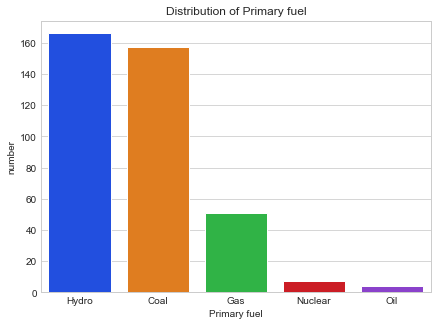

In [33]:
# Creating a barplot for 'primary_fuel'
Primary_fuel = df6["primary_fuel"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(Primary_fuel.index,Primary_fuel.values, palette='bright')
plt.title('Distribution of Primary fuel')
plt.xlabel('Primary fuel')
plt.ylabel('number')
plt.tick_params(labelsize=10)
plt.show()

## Hydro fuel is used maximum and than coal, minimum used fuel is oil

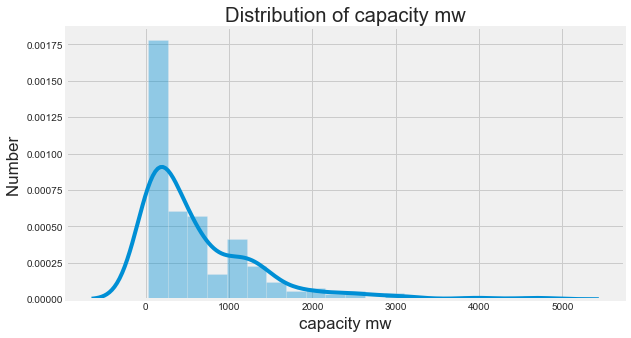

In [34]:
# Creating a distribution plot for 'capacity_mw'
capacity_mw= df6['capacity_mw'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df6['capacity_mw'], bins=20)
plt.title('Distribution of capacity mw')
plt.xlabel('capacity mw')
plt.ylabel('Number ')
plt.tick_params(labelsize=10)
plt.show()

## capacity mw is distributed mostly from range 0 to 900 and it is also a skewed data, we will takecare it later

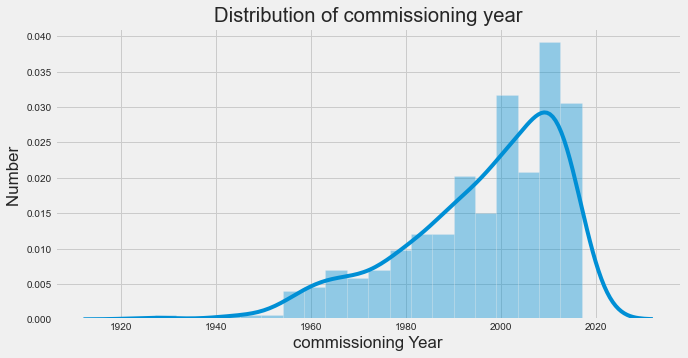

In [35]:
# Creating a distribution plot for 'commissioning_year'
commissioning_year= df6['commissioning_year'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df6['commissioning_year'], bins=20)
plt.title('Distribution of commissioning year')
plt.xlabel('commissioning Year')
plt.ylabel('Number ')
plt.tick_params(labelsize=10)
plt.show()

## commissioning_year data ranged maximum from 1990 to 2018

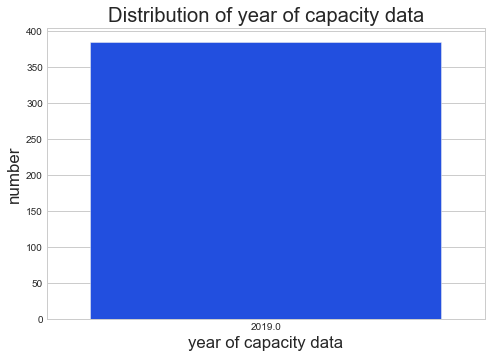

In [36]:
# Creating a barplot for 'year_of_capacity_data'
yearof_capacity_data = df6["year_of_capacity_data"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(yearof_capacity_data.index,yearof_capacity_data.values, palette='bright')
plt.title('Distribution of year of capacity data')
plt.xlabel('year of capacity data')
plt.ylabel('number')
plt.tick_params(labelsize=10)
plt.show()

## year_of_capacity_data column has only one value data and we will remove it later

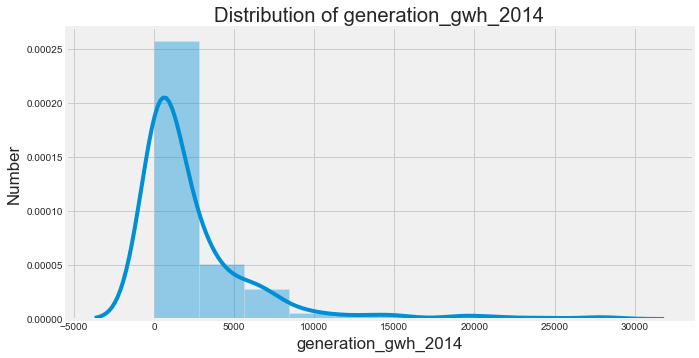

In [37]:
# Creating a distribution plot for 'generation_gwh_2014'
generation_gwh_2014= df6['generation_gwh_2014'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df6['generation_gwh_2014'], bins=10)
plt.title('Distribution of generation_gwh_2014')
plt.xlabel('generation_gwh_2014')
plt.ylabel('Number')
plt.tick_params(labelsize=10)
plt.show()

## it is also a skewed data ranges from 0 to 30000

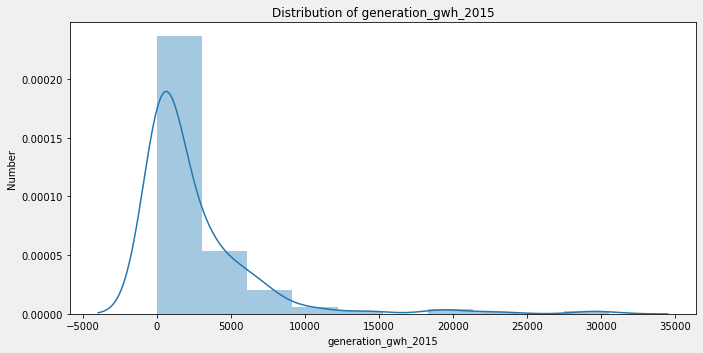

In [38]:
# Creating a distribution plot for 'generation_gwh_2015	'
generation_gwh_2015= df6['generation_gwh_2015'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.distplot(df6['generation_gwh_2015'], bins=10)
plt.title('Distribution of generation_gwh_2015')
plt.xlabel('generation_gwh_2015')
plt.ylabel('Number')
plt.tick_params(labelsize=10)
plt.show()

## very much similar to above data

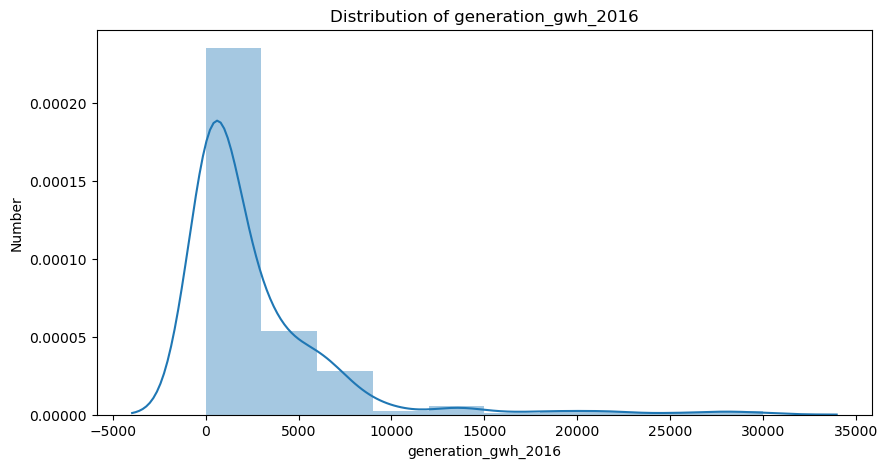

In [39]:
# Creating a distribution plot for 'generation_gwh_2016'
generation_gwh_2016= df6['generation_gwh_2016'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.distplot(df6['generation_gwh_2016'], bins=10)
plt.title('Distribution of generation_gwh_2016')
plt.xlabel('generation_gwh_2016')
plt.ylabel('Number')
plt.tick_params(labelsize=10)
plt.show()

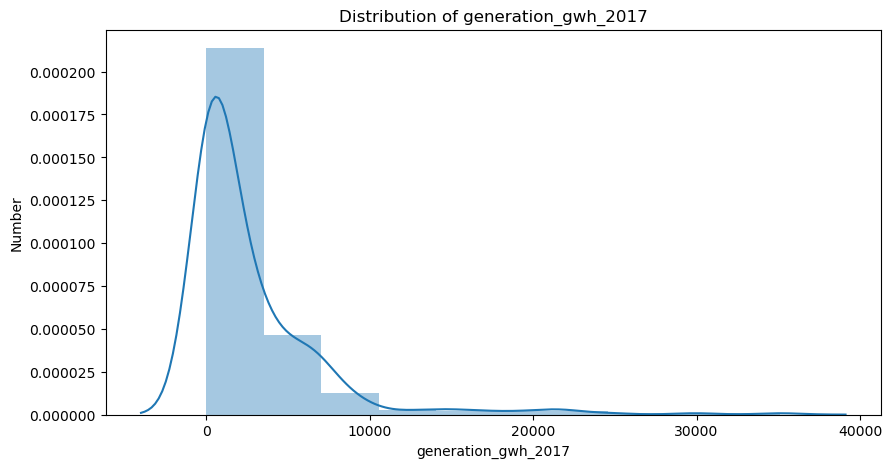

In [40]:
# Creating a distribution plot for 'generation_gwh_2017'
generation_gwh_2017= df6['generation_gwh_2017'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.distplot(df6['generation_gwh_2017'], bins=10)
plt.title('Distribution of generation_gwh_2017')
plt.xlabel('generation_gwh_2017')
plt.ylabel('Number')
plt.tick_params(labelsize=10)
plt.show()

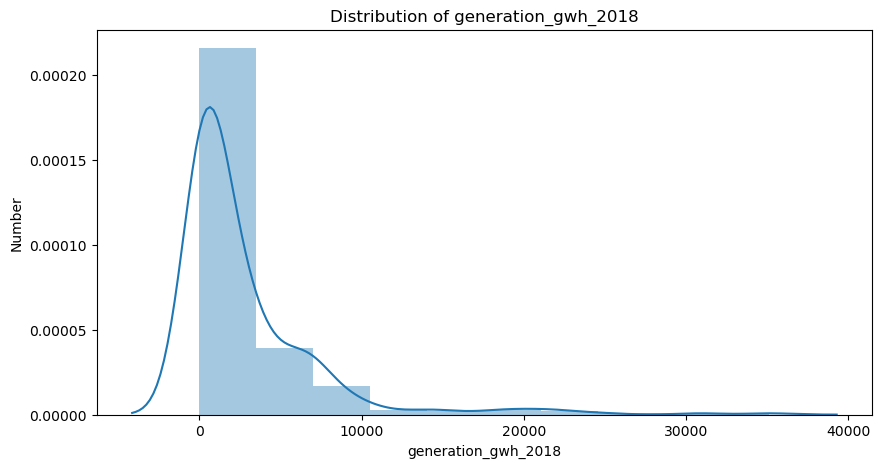

In [41]:
# Creating a distribution plot for 'generation_gwh_2018'
generation_gwh_2018= df6['generation_gwh_2018'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('default')
sns.distplot(df6['generation_gwh_2018'], bins=10)
plt.title('Distribution of generation_gwh_2018')
plt.xlabel('generation_gwh_2018')
plt.ylabel('Number')
plt.tick_params(labelsize=10)
plt.show()

## from the above visualization grap we can clearly say that all the generation_gwh data is not in normal distribution and we will fix it by tranfroming thses data  

# Encoding the object type data from Label Encoder technique

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
columns=['primary_fuel']
for x in columns:
    df6[x]= le.fit_transform(df6[x])
    
df6

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,135.0,23.8712,91.3602,1,2004.0,2019.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,1800.0,21.9603,82.4091,0,2015.0,2019.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,250.0,23.7689,68.6447,0,2005.0,2019.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,60.0,10.4547,77.0078,2,1970.0,2019.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,192.0,32.2258,77.2070,2,2010.0,2019.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
380,400.0,30.5669,79.5468,2,2006.0,2019.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
381,1470.0,22.8725,73.3588,0,1986.0,2019.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
382,540.0,20.2727,78.9792,0,2010.0,2019.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
383,62.4,30.3033,77.5684,2,1991.0,2019.0,184.453100,183.00000,204.253600,175.866250,236.491600


In [44]:
df6.drop(["year_of_capacity_data"],axis=1,inplace=True)

In [45]:
df7=df6.copy()

## checking the skewness of diffrerent column data

In [46]:
from scipy.stats import skew
from scipy import stats

capacity_mw
2.219389155781449


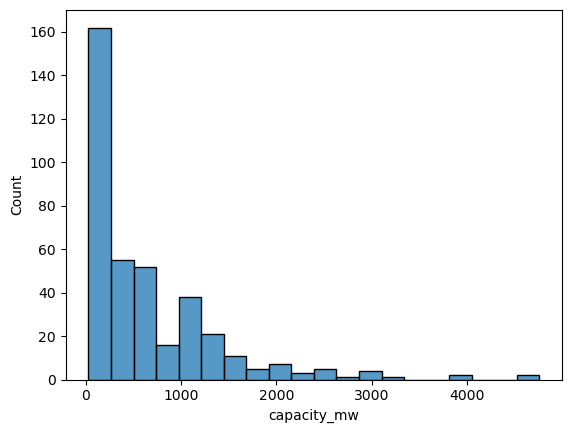

latitude
-0.1906613248011072


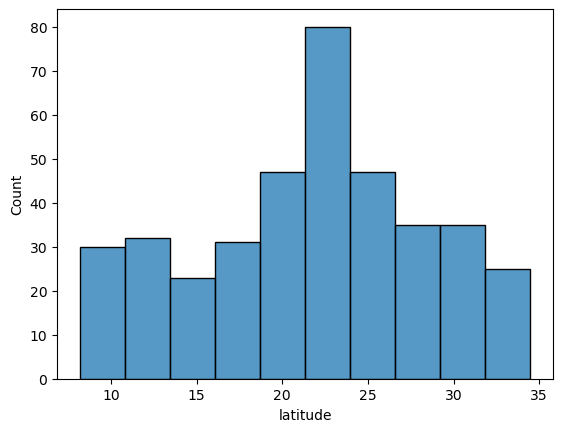

longitude
0.8745399041747804


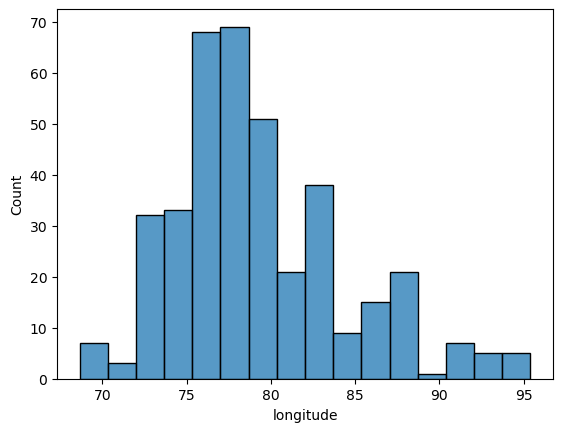

primary_fuel
0.17752602974743154


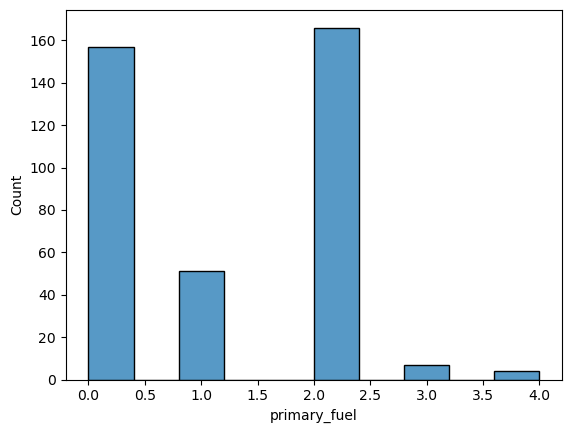

commissioning_year
-1.0161814996415843


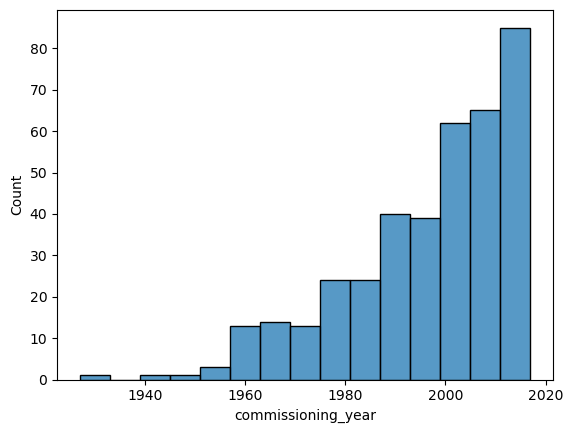

generation_gwh_2014
3.280536417287141


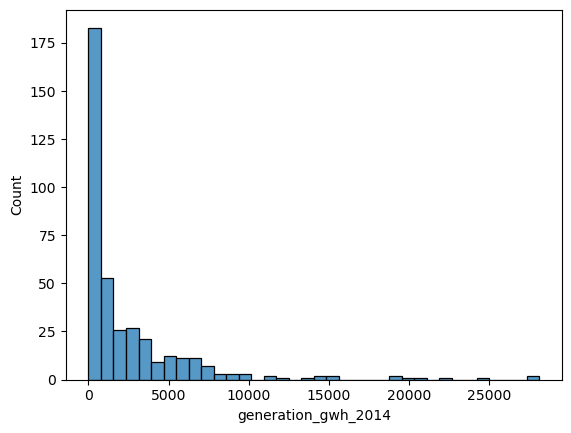

generation_gwh_2015
3.5048157878838313


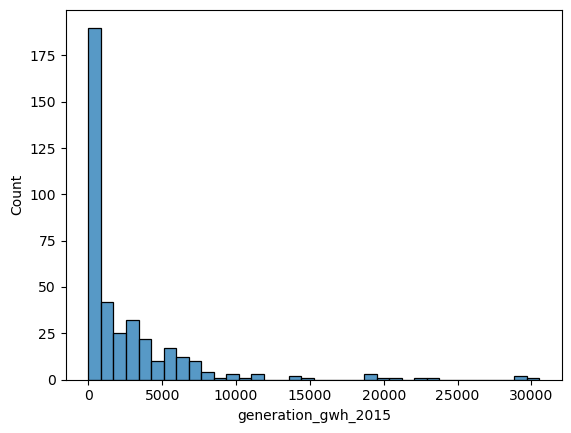

generation_gwh_2016
3.3509287986197505


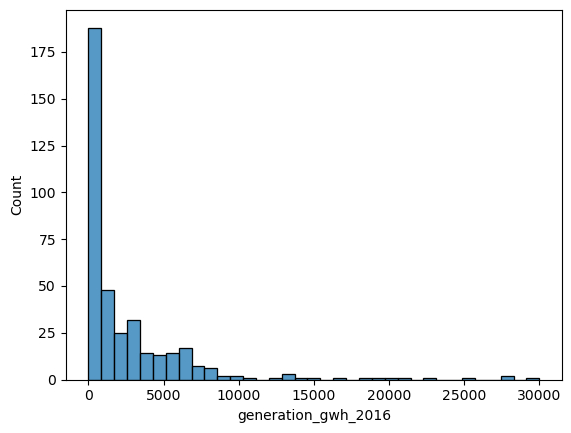

generation_gwh_2017
3.4482633948974617


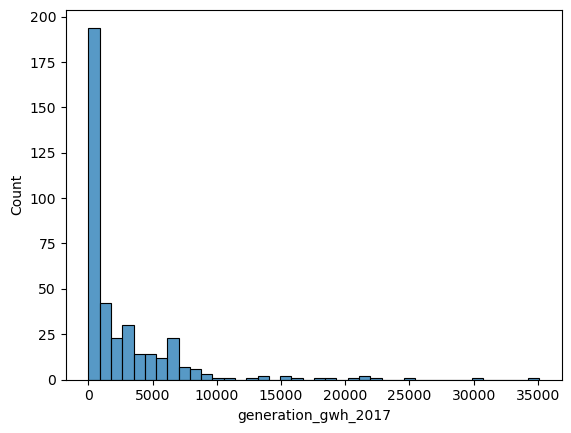

generation_gwh_2018
3.3305141113696144


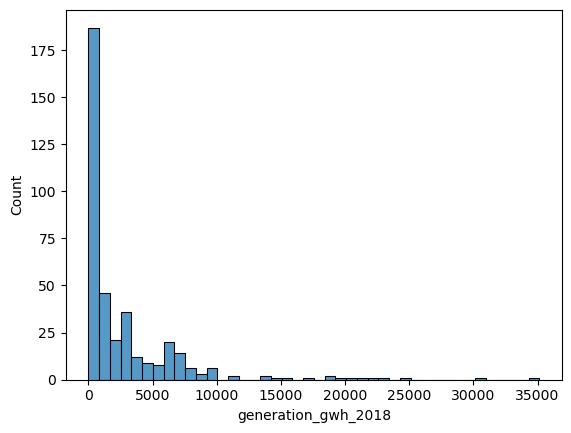

In [47]:
for col in df7:
    print(col)
    print(skew(df7[col]))
    
    
    plt.figure()
    sns.histplot(df7[col])
    plt.show()

## multicollinearity

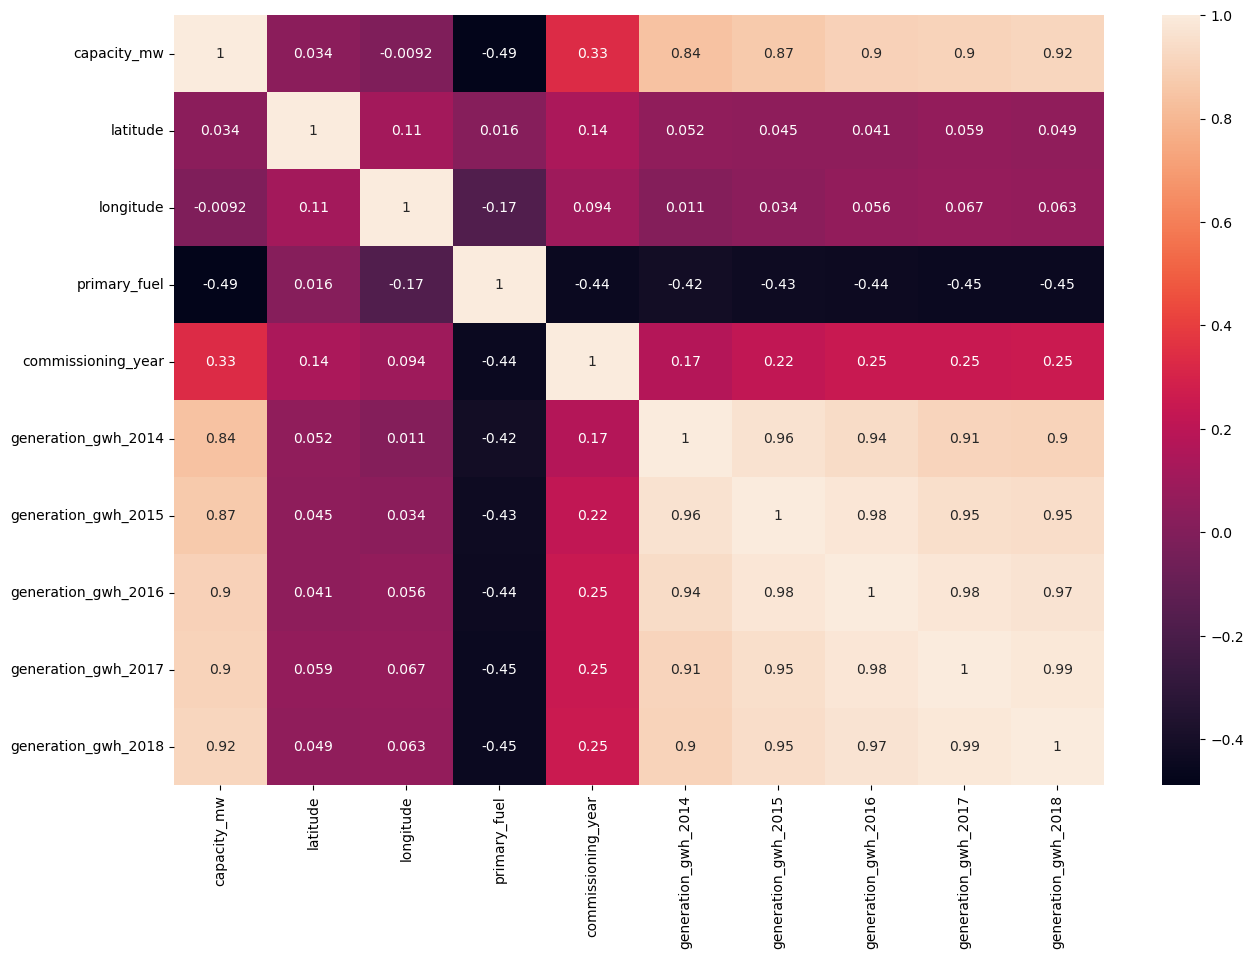

In [48]:
plt.figure(figsize = (15,10))
sns.heatmap(df7.corr(),annot=True)
plt.show()

In [49]:
df7.skew()

capacity_mw            2.228079
latitude              -0.191408
longitude              0.877964
primary_fuel           0.178221
commissioning_year    -1.020160
generation_gwh_2014    3.293382
generation_gwh_2015    3.518539
generation_gwh_2016    3.364050
generation_gwh_2017    3.461765
generation_gwh_2018    3.343555
dtype: float64

## transforming the skewed data

In [50]:
df7[['generation_gwh_2014',
     'generation_gwh_2015','generation_gwh_2016',
     'generation_gwh_2017','generation_gwh_2018']]=np.sqrt(df7[['generation_gwh_2014',
     'generation_gwh_2015','generation_gwh_2016',
     'generation_gwh_2017','generation_gwh_2018']])

In [51]:
df7.skew()

capacity_mw            2.228079
latitude              -0.191408
longitude              0.877964
primary_fuel           0.178221
commissioning_year    -1.020160
generation_gwh_2014    1.329934
generation_gwh_2015    1.361461
generation_gwh_2016    1.308547
generation_gwh_2017    1.266026
generation_gwh_2018    1.275546
dtype: float64

## skewness has removed ,now we will check the outliers

In [52]:
df8=df7.copy()

In [53]:
df8["capacity_mw"]=np.log(df8["capacity_mw"])

In [54]:
df8.skew()

capacity_mw           -0.179753
latitude              -0.191408
longitude              0.877964
primary_fuel           0.178221
commissioning_year    -1.020160
generation_gwh_2014    1.329934
generation_gwh_2015    1.361461
generation_gwh_2016    1.308547
generation_gwh_2017    1.266026
generation_gwh_2018    1.275546
dtype: float64

In [55]:
df9=df8.copy()

In [56]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          385 non-null    float64
 1   latitude             385 non-null    float64
 2   longitude            385 non-null    float64
 3   primary_fuel         385 non-null    int32  
 4   commissioning_year   385 non-null    float64
 5   generation_gwh_2014  385 non-null    float64
 6   generation_gwh_2015  385 non-null    float64
 7   generation_gwh_2016  385 non-null    float64
 8   generation_gwh_2017  385 non-null    float64
 9   generation_gwh_2018  385 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 28.7 KB


## checking the outliers from different columns of the dataset

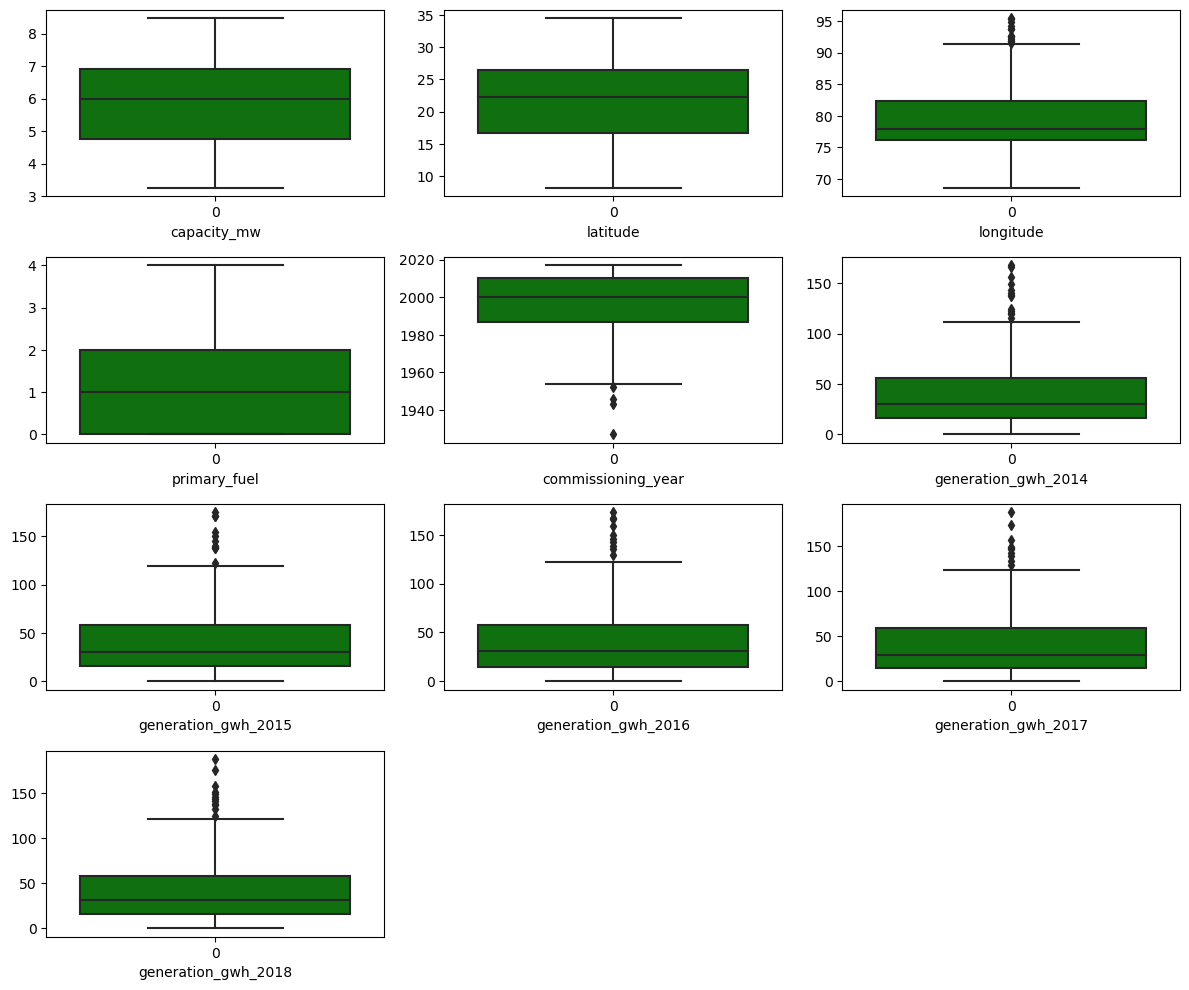

In [57]:
collist=df9[['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
             'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
             'generation_gwh_2017', 'generation_gwh_2018']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,10):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df9[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## removing the outliers

In [58]:
#1st quantile 
q1= df9.quantile(0.25)
#3rd quantile
q3=df9.quantile(0.75)
#IQR
iqr=q3-q1

In [59]:
Longitude=(q3.longitude + (1.5*iqr.longitude))
print(Longitude)   

index=np.where(df9['longitude']> Longitude)
index

df9=df9.drop(df9.index[index])
print(df9.shape)

df9.reset_index()

91.5198
(372, 10)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,4.905275,23.8712,91.3602,1,2004.0,24.855367,29.047323,29.765827,25.763822,25.024770
1,1,7.495542,21.9603,82.4091,0,2015.0,55.095826,76.917943,79.012657,73.386509,85.317056
2,2,5.521461,23.7689,68.6447,0,2005.0,33.962052,34.768549,34.289430,33.880865,31.251480
3,3,4.094345,10.4547,77.0078,2,1970.0,12.552221,12.336742,7.837177,9.467291,6.951773
4,4,5.257495,32.2258,77.2070,2,2010.0,25.969041,26.857684,25.994699,26.069042,24.069043
...,...,...,...,...,...,...,...,...,...,...,...
367,380,5.991465,30.5669,79.5468,2,2006.0,42.507179,34.707301,45.075933,46.369122,43.844725
368,381,7.293018,22.8725,73.3588,0,1986.0,82.181932,71.843845,59.494790,83.774799,87.076403
369,382,6.291569,20.2727,78.9792,0,2010.0,32.339140,40.634455,35.063942,31.609650,30.665779
370,383,4.133565,30.3033,77.5684,2,1991.0,13.581351,13.527749,14.291732,13.261457,15.378283


In [60]:
generation_gwh2014=(q3.generation_gwh_2014 + (1.5*iqr.generation_gwh_2014))
print(generation_gwh2014)   

index=np.where(df9['generation_gwh_2014']> generation_gwh2014)
index

df9=df9.drop(df9.index[index])
print(df9.shape)

df9.reset_index()

115.54838536248018
(359, 10)


,index,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,4.905275,23.8712,91.3602,1,2004.0,24.855367,29.047323,29.765827,25.763822,25.024770
1,1,7.495542,21.9603,82.4091,0,2015.0,55.095826,76.917943,79.012657,73.386509,85.317056
2,2,5.521461,23.7689,68.6447,0,2005.0,33.962052,34.768549,34.289430,33.880865,31.251480
3,3,4.094345,10.4547,77.0078,2,1970.0,12.552221,12.336742,7.837177,9.467291,6.951773
4,4,5.257495,32.2258,77.2070,2,2010.0,25.969041,26.857684,25.994699,26.069042,24.069043
...,...,...,...,...,...,...,...,...,...,...,...
354,380,5.991465,30.5669,79.5468,2,2006.0,42.507179,34.707301,45.075933,46.369122,43.844725
355,381,7.293018,22.8725,73.3588,0,1986.0,82.181932,71.843845,59.494790,83.774799,87.076403
356,382,6.291569,20.2727,78.9792,0,2010.0,32.339140,40.634455,35.063942,31.609650,30.665779
357,383,4.133565,30.3033,77.5684,2,1991.0,13.581351,13.527749,14.291732,13.261457,15.378283


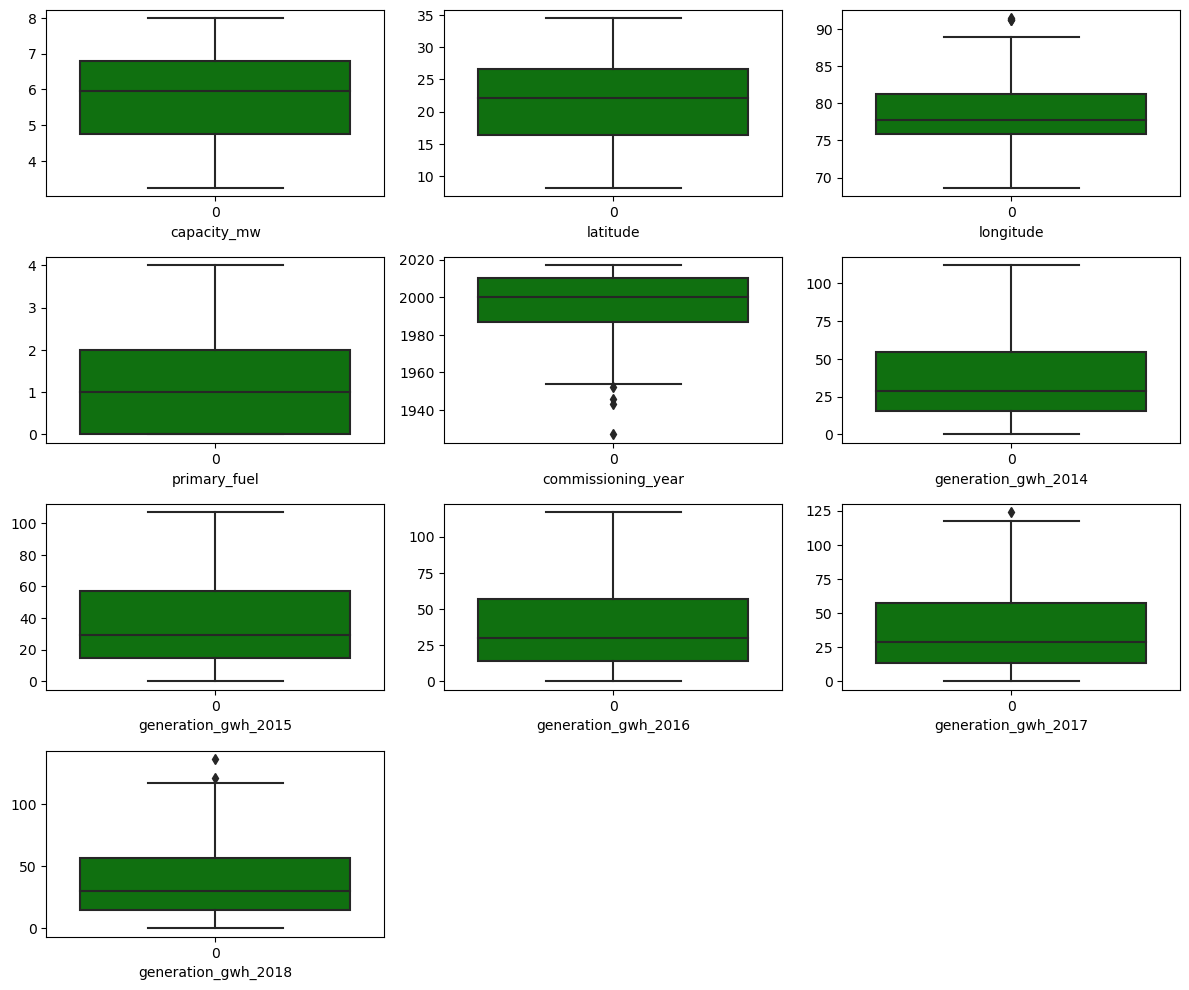

In [61]:
collist=df9[['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
             'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
             'generation_gwh_2017', 'generation_gwh_2018']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,10):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df9[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## Almost all outliers are removed

In [62]:
df10=df9.copy()

In [63]:
# Checking the counts of label categories
primary_fuel = df10['primary_fuel'].value_counts(normalize=True)
round(primary_fuel * 100, 2).astype('str') + ' %'

2    43.73 %
0    40.11 %
1    13.09 %
3     1.95 %
4     1.11 %
Name: primary_fuel, dtype: object

# Spliting the target and features

In [64]:
X=df10.drop('primary_fuel',axis=1)
X

y=df10['primary_fuel']
y

0      1
1      0
2      0
3      2
4      2
      ..
380    2
381    0
382    0
383    2
384    0
Name: primary_fuel, Length: 359, dtype: int32

In [65]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [66]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [67]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(359, 9)
(269, 9)
(90, 9)


# model preparation

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split

# 1.Logistic Regression

In [75]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.76      0.63      0.69        35
           1       0.42      0.38      0.40        13
           2       0.67      0.89      0.77        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.67        90
   macro avg       0.37      0.38      0.37        90
weighted avg       0.63      0.67      0.64        90



## cross_val_score

In [76]:
cross_val_score(model1,X,y,cv=10).mean()

0.7157936507936508

# 2. RandomForest Classifier

In [77]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.58      0.54      0.56        13
           2       0.80      0.89      0.85        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.77        90
   macro avg       0.43      0.45      0.44        90
weighted avg       0.72      0.77      0.74        90



## cross_val_score

In [78]:
cross_val_score(model2,X,y,cv=5).mean()

0.8078638497652582

# 3. Gradient Boosting Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.60      0.46      0.52        13
           2       0.88      0.97      0.92        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.80        90
   macro avg       0.45      0.46      0.45        90
weighted avg       0.75      0.80      0.77        90



## cross_val_score

In [80]:
cross_val_score(model3,X,y,cv=5).mean()

0.8161580594679186

# 4. Decision Tree Classifier

In [81]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        35
           1       0.53      0.62      0.57        13
           2       0.84      0.86      0.85        37
           3       0.50      0.25      0.33         4
           4       0.00      0.00      0.00         1

    accuracy                           0.74        90
   macro avg       0.53      0.49      0.50        90
weighted avg       0.74      0.74      0.74        90



## cross_val_score

In [82]:
cross_val_score(model4,X,y,cv=5).mean()

0.7825117370892019

# 5.Ada Boost Classifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55        35
           1       0.56      0.38      0.45        13
           2       0.65      0.95      0.77        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.63        90
   macro avg       0.37      0.36      0.35        90
weighted avg       0.59      0.63      0.60        90



## cross_val_score

In [85]:
cross_val_score(model5,X,y,cv=5).mean()

0.5207355242566509

# 6.KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.31      0.38      0.34        13
           2       0.81      0.78      0.79        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.69        90
   macro avg       0.37      0.39      0.38        90
weighted avg       0.66      0.69      0.67        90



## cross_val_score

In [97]:
cross_val_score(model6,X,y,cv=10).mean()

0.8132539682539683

# Model3 Gradient Boosting Classifier has highest accuracy with lowest difference to cross_val_score. so we will tune this model

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
param_grid={"n_estimators":[5,50,250],
            "max_depth":[1,3,5,7],
            "learning_rate":[0.01,0.1,1,10]
           }

In [100]:
grid_search=GridSearchCV(estimator=model3, param_grid=param_grid,n_jobs=-1)

In [101]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [5, 50, 250]})

In [102]:
best_param =grid_search.best_params_
print(best_param)

{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}


In [103]:
grid_search.best_score_

0.8514325646401119

In [104]:
grid_search=GradientBoostingClassifier(learning_rate=1,max_depth=5,n_estimators=50)
grid_search.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=50)

In [105]:
y_pred3=grid_search.predict(X_test)

In [106]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.55      0.46      0.50        13
           2       0.88      0.95      0.91        37
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.77        90
   macro avg       0.43      0.44      0.44        90
weighted avg       0.73      0.77      0.74        90



## saving the model

In [107]:
filename='globalpowerplant.pkl'
pickle.dump(model3,open(filename,'wb'))

In [108]:
log =pickle.load(open('globalpowerplant.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

80.0


## we have done tuning and also saved the model

# part B

In [109]:
df10.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,4.905275,23.8712,91.3602,1,2004.0,24.855367,29.047323,29.765827,25.763822,25.024770
1,7.495542,21.9603,82.4091,0,2015.0,55.095826,76.917943,79.012657,73.386509,85.317056
2,5.521461,23.7689,68.6447,0,2005.0,33.962052,34.768549,34.289430,33.880865,31.251480
3,4.094345,10.4547,77.0078,2,1970.0,12.552221,12.336742,7.837177,9.467291,6.951773
4,5.257495,32.2258,77.2070,2,2010.0,25.969041,26.857684,25.994699,26.069042,24.069043


In [111]:
df11=df10.copy()

In [112]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 384
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          359 non-null    float64
 1   latitude             359 non-null    float64
 2   longitude            359 non-null    float64
 3   primary_fuel         359 non-null    int32  
 4   commissioning_year   359 non-null    float64
 5   generation_gwh_2014  359 non-null    float64
 6   generation_gwh_2015  359 non-null    float64
 7   generation_gwh_2016  359 non-null    float64
 8   generation_gwh_2017  359 non-null    float64
 9   generation_gwh_2018  359 non-null    float64
dtypes: float64(9), int32(1)
memory usage: 37.6 KB


## spliting the target and features  

In [113]:
X=df11.drop('capacity_mw',axis=1)
X

y=df11['capacity_mw']
y

0      4.905275
1      7.495542
2      5.521461
3      4.094345
4      5.257495
         ...   
380    5.991465
381    7.293018
382    6.291569
383    4.133565
384    6.396930
Name: capacity_mw, Length: 359, dtype: float64

## train_test_split

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
y_test = np.array(y_test,dtype = float)

## data scaling

In [115]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [116]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [117]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [118]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1 linear regression

Explained_variance:  0.7366
R2:  0.7324
Adjusted_r2:  0.7023
MAE:  0.463
MSE:  0.3452
RMSE:  0.5875
Accuracy: 65.82 %
Standard Deviation: 8.50 %


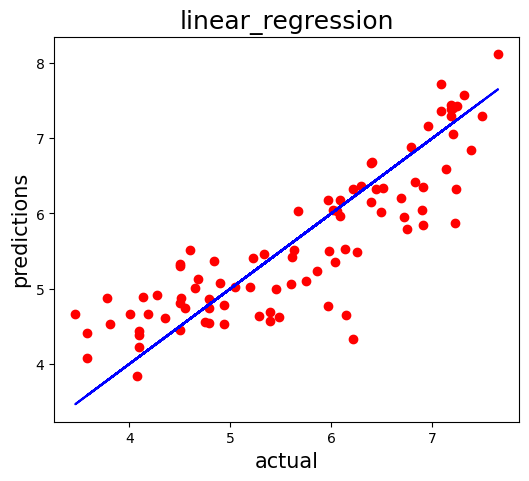

In [119]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

# 2. Random Forest Regression Model

Explained_variance:  0.8517
R2:  0.8516
Adjusted_r2:  0.8349
MAE:  0.3179
MSE:  0.1914
RMSE:  0.4375
Accuracy: 82.38 %
Standard Deviation: 5.48 %


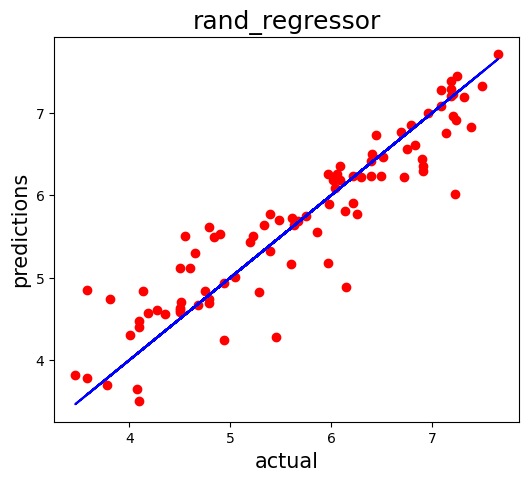

In [120]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

# 3. Decision Tree Regression Model

Explained_variance:  0.7044
R2:  0.6972
Adjusted_r2:  0.6632
MAE:  0.4638
MSE:  0.3906
RMSE:  0.625
Accuracy: 65.87 %
Standard Deviation: 11.30 %


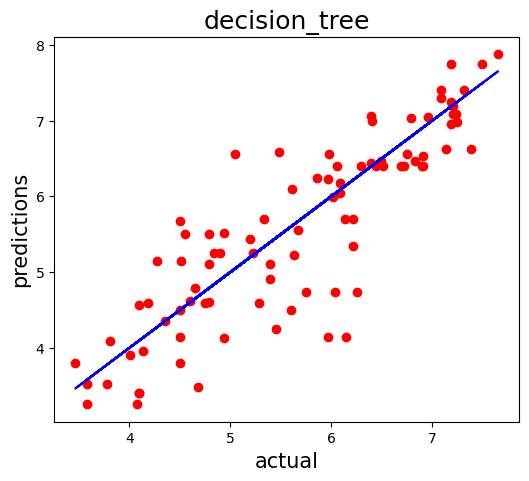

In [121]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


# 4.SVR model

Explained_variance:  0.8173
R2:  0.8065
Adjusted_r2:  0.7848
MAE:  0.3641
MSE:  0.2496
RMSE:  0.4996
Accuracy: 80.47 %
Standard Deviation: 4.28 %


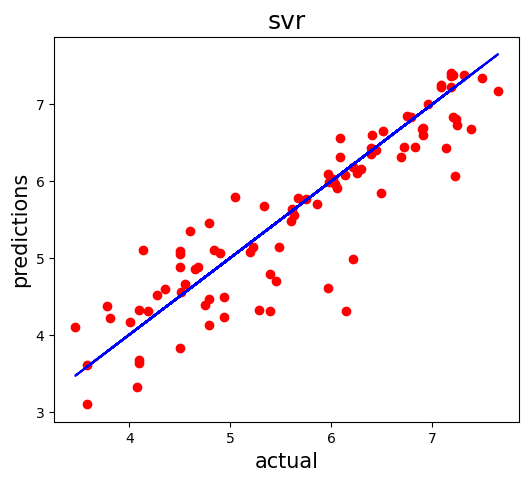

In [122]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

# 5.KNeighborsRegressor model

Explained_variance:  0.7126
R2:  0.6959
Adjusted_r2:  0.6617
MAE:  0.4431
MSE:  0.3923
RMSE:  0.6264
Accuracy: 73.86 %
Standard Deviation: 4.65 %


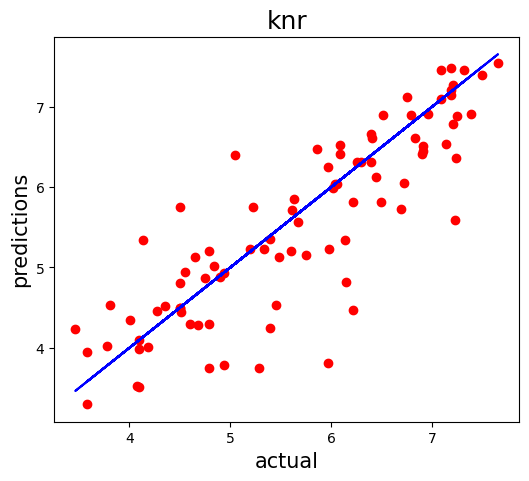

In [123]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

# 6.XGBRegressor model

Explained_variance:  0.8686
R2:  0.8682
Adjusted_r2:  0.8534
MAE:  0.3284
MSE:  0.17
RMSE:  0.4123
Accuracy: 81.11 %
Standard Deviation: 6.39 %


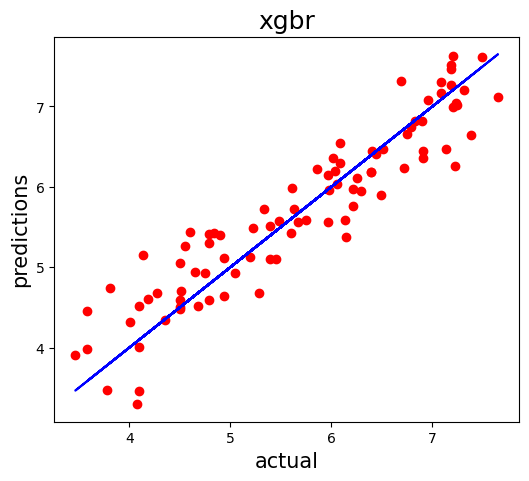

In [124]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

## out of all models XGBRegressor model has highest accuracy so we will tune this model for further improvement of this model

# Hyperparameter tuning using GridSearchCV

In [125]:
parameters =  {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [126]:
grd = GridSearchCV(xgbr, param_grid = parameters, cv =5, verbose=True, n_jobs=-1)

In [127]:
best_clf = grd.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[16:28:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:28:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [128]:
best_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=10, ...)

In [129]:
best_clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 6,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

Explained_variance:  0.7044
R2:  0.6972
Adjusted_r2:  0.6632
MAE:  0.4638
MSE:  0.3906
RMSE:  0.625
Accuracy: 82.83 %
Standard Deviation: 5.31 %


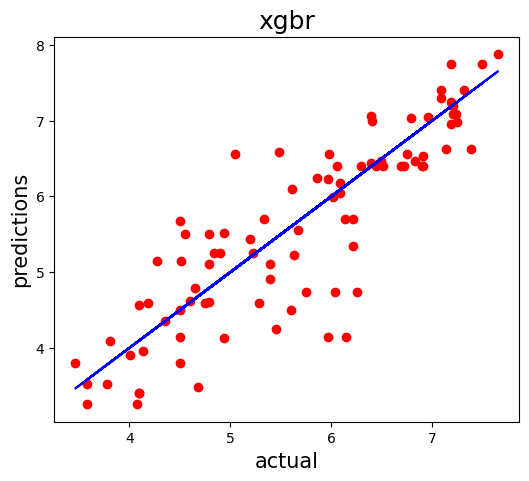

In [130]:
xgbr=XGBRegressor(colsample_bytree=0.7,learning_rate=0.03,max_depth= 6,min_child_weight= 4,n_estimators=500,nthread=4,subsample=0.7)
xgbr.fit(X_train, y_train)
y_pred_xgbr = decision_tree.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

## after tuning its accuracy has increased positively 

## saving the model

In [131]:
filename='globalpowerplant2.pkl'
pickle.dump(xgbr,open(filename,'wb'))

In [133]:
log =pickle.load(open('globalpowerplant2.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

85.6915848108294
